In [118]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [120]:
import numpy as np

n_uncorrelated_features = 2200
rng = np.random.RandomState(seed=0)
# Use same number of samples as in iris and 2200 features
X_rand = rng.normal(size=(X.shape[0], n_uncorrelated_features))

In [122]:
X_rand.shape

(150, 2200)

In [127]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score

clf = SVC(kernel='linear', random_state=7)
cv = StratifiedKFold(2, shuffle=True, random_state=0)

score_iris, perm_scores_iris, pvalue_iris = permutation_test_score(
    clf, X, y, scoring="roc_auc_score", cv=cv, n_permutations=1000)


ValueError: 'roc_auc_score' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [126]:
pvalue_iris

0.000999000999000999

In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [7]:
df

sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [2]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [110]:
principalDf 

principal component 1  principal component 2
0                -2.264542               0.505704
1                -2.086426              -0.655405
2                -2.367950              -0.318477
3                -2.304197              -0.575368
4                -2.388777               0.674767
..                     ...                    ...
145               1.870522               0.382822
146               1.558492              -0.905314
147               1.520845               0.266795
148               1.376391               1.016362
149               0.959299              -0.022284

[150 rows x 2 columns]

In [50]:
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523]


In [4]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

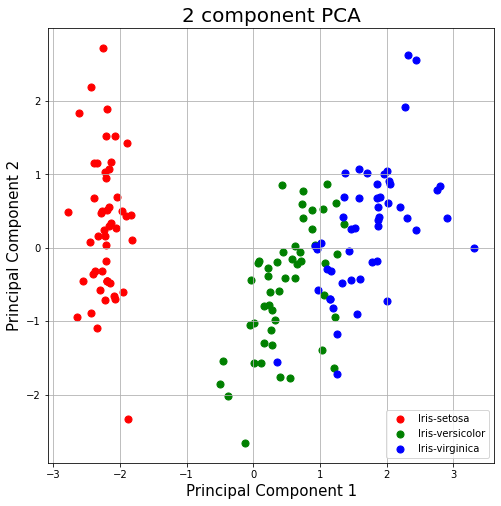

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [51]:
import numpy as np
rng = np.random.default_rng(seed=42)
xarr = rng.random((3, 3))

In [57]:
xarr[0,2] = 0

In [65]:
xarr

array([[0.        , 0.        , 0.        ],
       [0.69736803, 0.09417735, 0.97562235],
       [0.7611397 , 0.78606431, 0.12811363]])

In [63]:
rowmask=np.array([False,False,True])

In [22]:
from scipy import sparse
xarrs = sparse.csr_matrix(xarr)

In [92]:
R1

array([[        nan,         nan,         nan],
       [        nan,  1.        , -0.76492172],
       [        nan, -0.76492172,  1.        ]])

In [78]:
mask = np.isnan(R1)

In [81]:
mask

array([ True, False, False])

In [116]:
np.where(~mask)

(array([1, 2]),)

In [114]:
nan_rows = np.where(np.any(mask==True))[0].tolist()

(array([0]),)

In [93]:
mask = np.all(np.isnan(R1) , axis=1)
R2 = R1[~mask]

In [94]:
R2

array([[        nan,  1.        , -0.76492172],
       [        nan, -0.76492172,  1.        ]])

In [99]:
#mask = np.all(np.isnan(R2) , axis=0)
mask = np.all(np.isnan(R1) , axis=1)
R1[~mask,:][:,~mask]

array([[ 1.        , -0.76492172],
       [-0.76492172,  1.        ]])

In [108]:
y= np.insert(R1[~mask,:][:,~mask], nan_rows, np.nan, axis=0)
np.insert(y, nan_rows, np.nan, axis=1)

array([[        nan,         nan,         nan],
       [        nan,  1.        , -0.76492172],
       [        nan, -0.76492172,  1.        ]])

In [117]:
y

array([[        nan,         nan],
       [ 1.        , -0.76492172],
       [-0.76492172,  1.        ]])

In [67]:
mask

array([[ True,  True,  True],
       [ True, False, False],
       [ True, False, False]])

In [76]:
np.ma.array(R1,mask=mask)

masked_array(
  data=[[--, --, --],
        [--, 1.0, -0.7649217219589064],
        [--, -0.7649217219589063, 1.0]],
  mask=[[ True,  True,  True],
        [ True, False, False],
        [ True, False, False]],
  fill_value=1e+20)

In [71]:
R1[~[mask]]

TypeError: bad operand type for unary ~: 'list'

In [61]:
R1 = np.corrcoef(xarr)

/Users/ruchilohia/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/ruchilohia/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [62]:
R1

array([[        nan,         nan,         nan],
       [        nan,  1.        , -0.76492172],
       [        nan, -0.76492172,  1.        ]])

In [29]:
sparse.csr_matrix(np.corrcoef(xarrs.toarray()))

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [30]:
import numpy as np    
def sparse_corr(A):
    N = A.shape[0]
    C=((A.T*A -(sum(A).T*sum(A)/N))/(N-1)).todense()
    V=np.sqrt(np.mat(np.diag(C)).T*np.mat(np.diag(C)))
    COR = np.divide(C,V+1e-119)
    return COR

In [31]:
sparse_corr(xarrs)

matrix([[ 1.        ,  0.77598074, -0.47458546],
        [ 0.77598074,  1.        , -0.92346708],
        [-0.47458546, -0.92346708,  1.        ]])

In [13]:
xarr

array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235],
       [0.7611397 , 0.78606431, 0.12811363]])

In [17]:
from scipy import stats
stats.pearsonr(xarr[0,:], xarr[2,:])

(-0.6808098627031727, 0.5232559885447121)

In [41]:
def covcsr(x):
    '''return covariance matrix, assumes column variable'''
    meanx = x.sum(axis=0)/float(x.shape[0])
    return ((x.T*x)/x.shape[0] - meanx.T*meanx)

def corrcoefcsr(x):
    covx = covcsr(x)
    stdx = np.sqrt(np.diag(covx))[np.newaxis,:]
    return covx/(stdx.T * stdx)


B1 = xarrs
B1d = B1.todense()

print ('sparse cov:\n', covcsr(B1))
print ('np.cov:\n', np.cov(B1d, rowvar=0, bias=1))
print ('sparse corrcoef:\n', corrcoefcsr(B1))
print ('np.corrcoef:\n', np.corrcoef(B1d.T))

sparse cov:
 [[ 0.00112187  0.00734146 -0.00596084]
 [ 0.00734146  0.07978494 -0.09781472]
 [-0.00596084 -0.09781472  0.14061923]]
np.cov:
 [[ 0.00112187  0.00734146 -0.00596084]
 [ 0.00734146  0.07978494 -0.09781472]
 [-0.00596084 -0.09781472  0.14061923]]
sparse corrcoef:
 [[ 1.          0.77598074 -0.47458546]
 [ 0.77598074  1.         -0.92346708]
 [-0.47458546 -0.92346708  1.        ]]
np.corrcoef:
 [[ 1.          0.77598074 -0.47458546]
 [ 0.77598074  1.         -0.92346708]
 [-0.47458546 -0.92346708  1.        ]]


In [48]:
np.count_nonzero(np.isnan(xarrs.toarray()))

0

In [47]:
sparse.csr_matrix.count_nonzero(np.isnan(xarrs))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''